In [1]:
import numpy as np
from matplotlib import pyplot as plt
import DSPPythonWrapper as wrp

## Global parameters/constants
plt.rcParams['figure.figsize'] = [7, 7]

In [2]:
mesh_width = 102.21  # mm
mesh_height = 79.35  # mm
spatial_resolution = 5  # mm

mesh = wrp.Triangular2DMesh(mesh_width, mesh_height,
    spatial_resolution)

mesh_coords = mesh.GetMeshCoordinates()
# How large should this vector be?
lenk_internal = np.ceil(mesh_width * 2 / spatial_resolution)
lenk_internal += 1 - np.mod(lenk_internal, 2)
expected_c = np.ceil(mesh_height / (spatial_resolution
    * np.sqrt(3) / 2))
expected_c += np.mod(expected_c, 2)
expected_k_odd = lenk_internal // 2
expected_k_even = lenk_internal // 2 + 1
expected_data_length = expected_c * expected_k_even - (expected_c // 2)
assert(expected_data_length == mesh_coords.shape[0])
assert(2 == mesh_coords.shape[1])
assert(mesh_coords.dtype == np.float32)
print("All assertions passed")

All assertions passed


Text(0.5, 0.98, 'Mesh structure VS specifications')

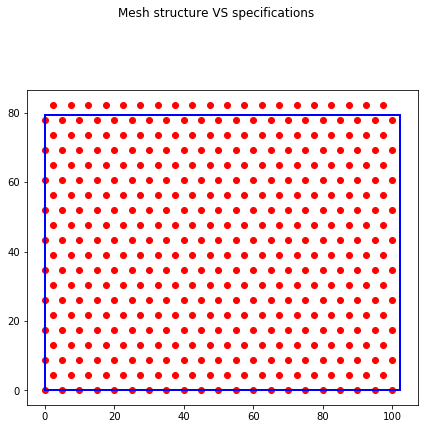

In [3]:
## Plot mesh coordinates

fig = plt.figure()
ax = plt.axes()
from matplotlib.patches import Rectangle
mesharea = Rectangle((0, 0), mesh_width, mesh_height, facecolor='none', linewidth=2, edgecolor="b")
_ = ax.add_patch(mesharea)
_ = plt.scatter(mesh_coords[:,0], mesh_coords[:,1], c="r")
ax.set_aspect("equal")
fig.suptitle("Mesh structure VS specifications")

In [6]:
## Inspect mesh mask

mesh_mask = mesh.GetMask()
assert(expected_data_length == mesh_mask.shape[0])
assert(6 == mesh_mask.shape[1])
print("All assertions passed")

All assertions passed


In [8]:
## Plot mesh mask structure

def getLinePoints(xp, yp, direction):
    """
    xp, yp: coordinates of the mesh point
    direction: enum of the direction clockwise (NE, E, SE, SW, W, NW)
    """
    angles = np.arange(np.pi/3, -6/3*np.pi, -np.pi/3)
    yd = np.sin(angles[direction]) * spatial_resolution / 2 + yp
    xd = np.cos(angles[direction]) * spatial_resolution / 2 + xp
    return (xd, yd)



(1.2500000000000002, 2.1650635094610964)
(2.5, 0.0)
(1.2500000000000002, -2.1650635094610964)
(-1.2500000000000004, -2.1650635094610964)
(-2.5, -3.061616997868383e-16)
(-1.250000000000001, 2.165063509461096)
